# Statistical analysis of Diablo II rune hunting using the geometric distribution

I was inspired by this [awesome guide](https://www.diabloii.net/forums/threads/lk-vs-travincal-vs-cows-runefinding-guide.940121/) on rune hunting from diabloii.net forums. The post works great as a guide, but as a nerd, I wanted to find out more about the exact probabilities for runes, specifically in Lower Kurast super chests.

Here's a video showing the action in-game:
https://www.youtube.com/watch?v=zK50mANYX_E

I wasn't satisfied with just the expected numbers, and I wanted to make my own interpretation of the odds based on a visual and descriptive analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import geom

First, we need to declare some constants such as the number of patterns containing runes in the superchests and variables such as the number of chests we are opening on each run.

The independent probability $p$ for getting a drop from the Pul+ patterns or Vex+ patterns are calculated as the probability of at least one success in six Bernoulli trials. 

In [2]:
# Calculate probability for pul+ and vex+ from super chests in Lower Kurast

#Set the parameters
N_chests = 6
N_patterns = 65536
N_pul = 82
N_vex = 27

# Calculate individual odds for getting pul+ or vex+ from a single chest
p_pul = N_pul/N_patterns
p_vex = N_vex/N_patterns

# Probability for at least one pul+ and vex+ from one of the chests...
# .. in the course of one run (as a binomial trial)
p_run_pul = 1 - (1-p_pul)**6
p_run_vex = 1 - (1-p_vex)**6


## Cumulative distribution function

How do we start analysing the probabilities for high runes? We need a statistical model to explain this random phenomenon. The distribution that should apply quite well for our purposes is the [geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution). In this instance, we specifically want to analyse how many LK runs (attempts or trials) we should expect and what kind of variation in the number of runs there will be - statistically. We don't just want to a single number representing how many runs are needed on average, but also to define some kind of a range, or a lower and upper limit of runs that can be reasonably expected.

I'm not going to explain how the mathematics work, but I will say this:

* The geometric distribution gives the probability that the first occurrence of success requires $k$ independent trials, each with success probability $p$.

This applies to Diablo pretty well, since each trial is indeed independent of each other. Whether or not you found a SoJ on your previous Mephisto run does not affect the probability on your next run. Also, generally in Diablo we are concerned about the number of runs $k$ (trials) as a metric for how much effort or time is needed to get an item.

The [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) of a random variable $X$ tells us the probability that $X$ is less than or equal to a given value. For example, the CDF of the geometric distribution will tell us:

*What is the probability to get a successful drop in less than or equal to 100 LK runs?*

Isn't that nice? Yes, indeed. (Read the wikipedia pages if you want to know more.)

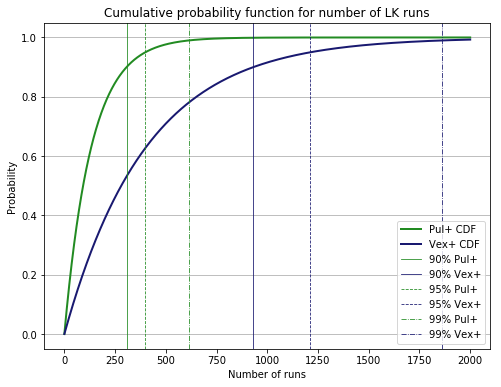

In [3]:
# Model the number of runs needed to obtain at least one pul+ and vex+ ...
# ... as a geometric distribution

plt.figure(figsize=((8,6)))
max_runs = 2000 # x axis limit (number of runs to plot for)

# Plot the CDF of both Pul+ and Vex+
x = np.arange(0,max_runs+1)
cdf_pul = geom.cdf(x, p_run_pul)
cdf_vex = geom.cdf(x, p_run_vex)

# Pul+
plt.plot(x, cdf_pul, c='forestgreen', linewidth = 2)

# Vex+
plt.plot(x, cdf_vex, c='midnightblue', linewidth = 2)

# How many runs are needed for a probability equal to or larger than alpha for a drop in Pul+ or Vex+ ?
alphas = [0.90, 0.95, 0.99]
probs = [p_run_pul, p_run_vex]
rune_names = ['Pul+','Vex+']

# Set colors and linetypes of the quantiles
vertcolors = ['forestgreen','midnightblue']
linetypes = ['solid','dashed','dashdot']

# Store quantiles in dataframe
df_quants = pd.DataFrame(columns=rune_names,index=alphas)

# Plot the quantiles
for alpha, ltype in zip(alphas, linetypes):
    for prob, rname, vcolor in zip(probs,rune_names, vertcolors):
        quant_runs = geom.ppf(alpha, prob)
        plt.axvline(x=quant_runs, linestyle = ltype, linewidth = 0.8, c=vcolor, label = rname)
        df_quants.loc[alpha,rname] = quant_runs
        
plt.legend(['Pul+ CDF', 'Vex+ CDF', '90% Pul+', '90% Vex+', '95% Pul+', '95% Vex+', '99% Pul+', '99% Vex+'])
plt.grid(axis='y')
plt.title('Cumulative probability function for number of LK runs')
plt.xlabel('Number of runs')
plt.ylabel('Probability')
plt.show()

**What does this picture tell us?**

For example, it answers questions like:

* How many runs are expected to get a Vex rune or higher with a probability of 95%?
* How unlucky am I if I didn't get a Pul rune after 200 runs?
* How much harder are Vex+ runes to find compared to Pul+ runes?

The first question is really the most interesting, since we can now see that if you plan to do a 1000 runs, you know for sure that your probability to obtain a Vex+ rune is somewhere between 90%-95%. You also know beforehand that you are almost guaranteed to find a Pul rune or higher by 1000 runs. The probability of this event exceeds 99% already at exactly 614 runs.

Let's put these "breakpoints" into a table if you want to check out the exact values.

In [4]:
# Show probabilites in table format
display(df_quants)

,Pul+,Vex+
0.90,307,932
0.95,399,1212
0.99,614,1863


### Probability mass function

Let's also plot the [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) (pmf), which will help us understand why the cumulative distribution function is shaped the way it is.

We see that especially for Pul+ runes, you can almost bet on getting a drop in less than 500 runs, and 250 runs already covers a large portion of the probability mass. This is already evident from the CDF, but it is nice to see here as well.

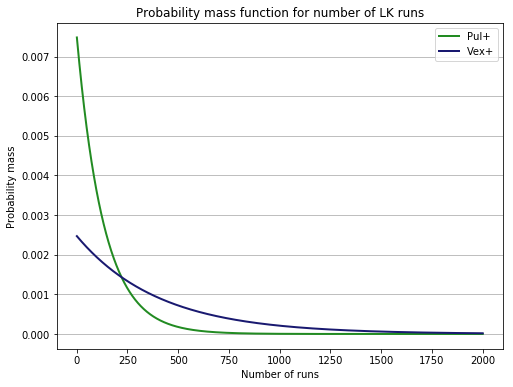

In [5]:
plt.figure(figsize=((8,6)))
max_runs = 2000 # x axis limit (number of runs to plot for)

# Plot the CDF and PDF of both Pul+ and Vex+
x = np.arange(1,max_runs+1)
pdf_pul = geom.pmf(x, p_run_pul)
pdf_vex = geom.pmf(x, p_run_vex)

# Pul+
plt.plot(x, pdf_pul, c='forestgreen', linewidth = 2)

# Vex+
plt.plot(x, pdf_vex, c='midnightblue', linewidth = 2)

plt.grid(axis='y')
plt.legend(['Pul+', 'Vex+'])
plt.title('Probability mass function for number of LK runs')
plt.xlabel('Number of runs')
plt.ylabel('Probability mass')
plt.show()

## Descriptive statistics from a sampled data set

Get some "experimental" descriptive statistics using numpy's random number generator. Let's generate $10^5$ samples from the geometric distributions describing Pul+ and Vex+ probabilities for runs with 6 chests. **So basically we are making the computer find 100,000 of both runes doing LK runs and it will tell us how many attempts it took to find the first rune.**

We could've plotted these statistics into the CDF graph, but I am too lazy so we will just look at them in table format. 

For example, we can see that for Vex+ runes, the middle 50% of the probability mass is between 118 and 566 runs. That can be interpreted as **"you have a 50% chance that the first Vex rune or higher you see happens in approximately between 120 to 570 runs".**

That's a pretty large range, which is explained by the standard deviation of approx. 400 for the Vex+ sample. The intepretation is that finding these high runes are really down to luck. The shape of the CDF and PMF for Vex+ also shows this - take note how the slope of the function is more gradual, whereas in comparison the functions for Pul runes are steeper. As you can see from the table below, the standard deviation (and variance) for the Pul+ sample is relatively low compared to the higher rune pattern for Vex and above.

But hey, the good news? I guess? **After finding 100,000 Vex runes or higher, the largest number of runs it took for one rune was only 4349.** I mean, it could be worse. But some of you will have experienced this for sure.

How much time is 4350 LK runs? Assuming 30 second runs, and 95% efficiency (95% time is spent running and the rest stashing, trading, etc.)

$$
30\,\text{s} \cdot0.95 \cdot4350 = 130500\, \text{s} \approx 34.4\,\text{hours}
$$

The 1000 runs or less, which is the number of runs for Vex+ rune with a probability of 90% is much less than this. In fact, it is approximately 8 hours. So again, in terms of hours, **with a probability of 90%, you will find a Vex rune or higher in less than 8 hours.**

In [6]:
randpul = np.random.geometric(p_run_pul,10**5)
randvex = np.random.geometric(p_run_vex,10**5)
df_rand = pd.DataFrame(data = {'Pul+': randpul, 'Vex+': randvex})
df_rand.describe()

,Pul+,Vex+
count,100000.000000,100000.000000
mean,133.463900,404.450370
std,133.458052,405.449071
min,1.000000,1.000000
25%,39.000000,116.000000
50%,92.000000,280.000000
75%,184.000000,561.000000
max,1854.000000,5333.000000
